<center><h1 style="color:lightsalmon"><b>Google Playstore Analysis and Visualization</b></hi></center>

### In this notebook, we are aiming to understand the trend of current Google Playstore market.  

We are trying to create an analysis and visualization to interpret our findings on the Google Play Apps Dataset, available on Kaggle. This is my first ever project on Kaggle. So, pardon the errors and shortcomings that may come up in this notebook.

Let us first look into the variables available in the dataset.


------------------------------------------------------------------------------------------------------
    

## Business Task

We are on a venture to find out how many times an app will be downloaded based on the Google Play Apps Data set.This Dataset gives information about the Ratings, Reviews, Size, Genre etc of an app. We are here to find out which of this variable have an undenibale effect and influence of the app being published on the Google Play store.

In [1]:
#importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

## Description of Dataset

<h3>We are using a csv file "googleplaystore.csv", available on Kaggle.  
Before getting into actual EDA, we will familiarize with the variables :- </h3> 

    1) App :- Name of the App
    2) Category :- Category under which the App falls.
    3) Rating :- Application's rating on playstore
    4) Reviews :- Number of reviews of the App.
    5) Size :- Size of the App.
    6) Install :- Number of Installs of the App
    7) Type :- If the App is free/paid
    8) Price :- Price of the app (0 if it is Free)
    9) Content Rating :- Appropiate Target Audience of the App.
    10) Genres:- Genre under which the App falls.
    11) Last Updated :- Date when the App was last updated
    12) Current Ver :- Current Version of the Application
    13) Android Ver :- Minimum Android Version required to run the App


First step is to Load the data

In [2]:
#Reading data
googledata = pd.read_csv("../input/googleplaystore.csv")

print("\n First 5 rows in our dataset")
display(googledata.head())

print("\n Number of rows in the dataset = " + str(googledata.shape[0]))


 First 5 rows in our dataset


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



 Number of rows in the dataset = 10841


### Features Engineering  

Our target variable is <b><i>'Installs'</i></b>
As we can see from the above snippet of the csv file, the  Genres and Category columns are somewhat same. So we are dropping the Genres column as Category column is easier to analyze.

Before getting into the Analysis and Visualization part, we need to first ensure that the format of our our data is ready to be analyzed.
    

In [3]:

googledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
googledata.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [5]:
# dropping the unwanted Genres column
googledata.drop("Genres",axis=1, inplace=True)

In [6]:
# separating Last Updated column into 2 different columns and then dropping LAst Updated column
googledata[['Date','Year']] = googledata["Last Updated"].str.split(",",expand=True)
googledata.drop("Last Updated", axis=1, inplace=True)

# Removing the special characters from the Install column 
googledata['Install1'] = googledata["Installs"].str.replace('+','')
googledata['Install']=googledata['Install1'].str.replace(',','')
googledata.Size = [x.strip().replace('M', '') for x in googledata.Size]
googledata.Size = [x.strip().replace('k', '') for x in googledata.Size]


#dropping all the ewxtra columns that were created on the way
googledata.drop("Installs",axis=1, inplace =True)
googledata.drop("Install1",axis=1, inplace =True)


In [7]:
googledata.head(7)

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Current Ver,Android Ver,Date,Year,Install
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,0,Everyone,1.0.0,4.0.3 and up,January 7,2018,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,Free,0,Everyone,2.0.0,4.0.3 and up,January 15,2018,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0,Everyone,1.2.4,4.0.3 and up,August 1,2018,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,0,Teen,Varies with device,4.2 and up,June 8,2018,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0,Everyone,1.1,4.4 and up,June 20,2018,100000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,Free,0,Everyone,1.0,2.3 and up,March 26,2017,50000
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,Free,0,Everyone,1.1,4.0.3 and up,April 26,2018,50000


### Missing Values

Next, we need to deal with the missing values in the data to be able to analyze it.

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc.

Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them

In [8]:
googledata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Type                 1
Price                0
Content Rating       1
Current Ver          8
Android Ver          3
Date                 0
Year                 1
Install              0
dtype: int64

The given dataset is a pretty clean dataset. But this might not be the case always as you can often encounter missing values represented as NaN values in the data.

There are two methods of dealing with missing data:
- Dropping them
- Imputing them.
Depending on the case we can allow a specific proportion of missing values, beyond which we might want to drop the variable from analysis. But this varies from case to case on the amount of information you think the variable has. 

If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values. There are projects / models where imputation of even 20 - 30% missing values provided better results - the famous Titanic dataset on Kaggle being one such case. Age is missing in ~20% of cases, but you benefit by imputing them rather than ignoring the variable.

We can see that out of our 10000 rows, almost 1500 of the rows have null values in place of Ratings. Hence we are taking the mean of the Rating column and filling up the null values.

In case of other variables like, Type, Android Ver etc, the number of null values are too negligible that one can either drop it or fill it. I am just using a fillna command with forward fill to remove null values in the rest of the columns.

In [9]:
#Rating column
googledata['Rating'].fillna(googledata['Rating'].mean(),inplace=True)

# Current Version
googledata['Current Ver'].fillna(method='ffill',inplace=True)

#Androi Version
googledata['Android Ver'].fillna(method='ffill',inplace=True)

# Type
googledata['Type'].fillna(method='ffill',inplace=True)

#Content Rating
googledata['Content Rating'].fillna(method='ffill',inplace=True)

#Year
googledata['Year'].fillna(method='ffill',inplace=True)

In [10]:
googledata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Type              0
Price             0
Content Rating    0
Current Ver       0
Android Ver       0
Date              0
Year              0
Install           0
dtype: int64

On studying the dataset further, it was found that there was a data with some kind of weird anomaly. Let us find out the row in the data and purge it.

In [11]:
googledata['Rating'].max()

19.0

In [12]:
googledata[googledata['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Current Ver,Android Ver,Date,Year,Install
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,Everyone,Everyone,4.0 and up,4.0.3 and up,1.0.19,2014,Free


We see that this entry of our dataset is having a Rating of 19.0 which is way higher than the maximum rating of 5.0. Also, The value in the Reviews column has an alphabet which makes it a lone entry to have so. Hence we are removing this particular row to make our analysis easier. 

In [13]:
googledata.drop([10472],inplace=True)

Now let us convert some of the categorical variables into numerical for ease of analysis.

In [14]:
googledata["Reviews"]= googledata.Reviews.apply(lambda x: int(x))
googledata["Rating"]= googledata.Reviews.apply(lambda x: int(x))
googledata["Year"]= googledata.Year.apply(lambda x: int(x))
googledata["Price"]= googledata.Price.apply(lambda x: str(x).replace("$",""))
googledata["Price"] = googledata.Price.apply(lambda x: float(x))
googledata["Size"] = googledata["Size"].apply(lambda x: float(x) if x != "Varies with device" else str(x))

googledata['Install']= [int(x) if x.isnumeric() else x for x in googledata['Install']]

In [15]:
googledata.dtypes

App                object
Category           object
Rating              int64
Reviews             int64
Size               object
Type               object
Price             float64
Content Rating     object
Current Ver        object
Android Ver        object
Date               object
Year                int64
Install             int64
dtype: object

### Numerical And Categorical Columns

Looking at the dataset, we think we can identify the categorical and continuous columns in it. Right? But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the feature

In [16]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = googledata.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns                                                                

# we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())

Numeric Features:
   Rating  Reviews  Price  Year   Install
0     159      159    0.0  2018     10000
1     967      967    0.0  2018    500000
2   87510    87510    0.0  2018   5000000
3  215644   215644    0.0  2018  50000000
4     967      967    0.0  2018    100000


In [17]:
# IDENTIFYING CATEGORICAL FEATURES

cat_data = googledata.select_dtypes(exclude=np.number) # select_dtypes selects data with numeric features
cat_col = cat_data.columns                                                                

# we will store the numeric features in a variable

print("Numeric Features:")
print(cat_data.head())

Numeric Features:
                                                 App        Category Size  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   19   
1                                Coloring book moana  ART_AND_DESIGN   14   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN  8.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   25   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN  2.8   

   Type Content Rating         Current Ver   Android Ver        Date  
0  Free       Everyone               1.0.0  4.0.3 and up   January 7  
1  Free       Everyone               2.0.0  4.0.3 and up  January 15  
2  Free       Everyone               1.2.4  4.0.3 and up    August 1  
3  Free           Teen  Varies with device    4.2 and up      June 8  
4  Free       Everyone                 1.1    4.4 and up     June 20  


In [18]:
class_values = (googledata['Install'].value_counts()/googledata['Install'].value_counts().sum())*100
print(class_values)

1000000       14.566421
10000000      11.549815
100000        10.784133
10000          9.723247
1000           8.367159
5000000        6.937269
100            6.632841
500000         4.972325
50000          4.418819
5000           4.400369
100000000      3.773063
10             3.560886
500            3.044280
50000000       2.666052
50             1.891144
5              0.756458
500000000      0.664207
1              0.618081
1000000000     0.535055
0              0.138376
Name: Install, dtype: float64


## Visualization

Now that all the null values are removed, columns are split appropriately and unwanted columns are dropped, let us now move on to actually analyzing each variable and whether or not, our target variable, <b><i>Install</i></b> is dependent on it. Also, we can plot the inferred dependencies.

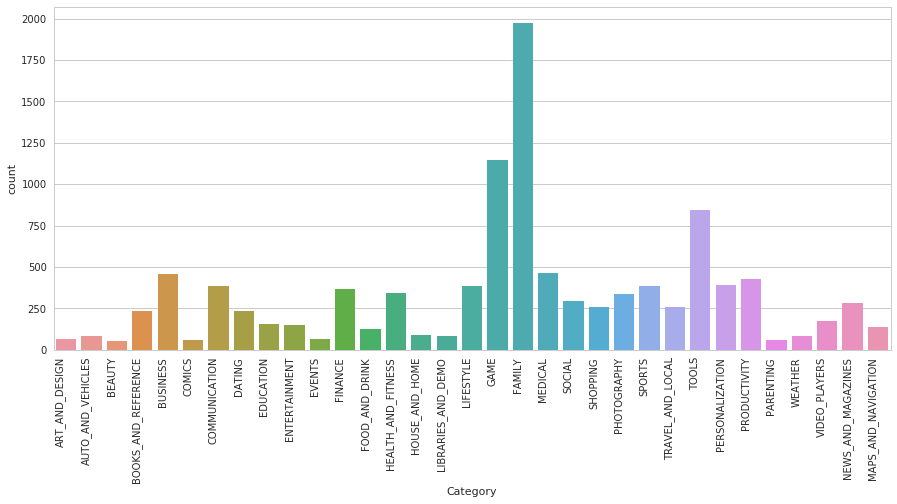

,Category,Count
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460


In [19]:
#Number of categories of apps in the store.
def plot_number_category():
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 7)
    fig.autofmt_xdate()
    countplot=sns.categorical.countplot(googledata.Category,ax=ax)
    plt.xticks(rotation = 90)
    plt.show(countplot)

plot_number_category()

# Tabular representation
top_cat=googledata.groupby('Category').size().reset_index(name='Count').nlargest(5,'Count')
display(top_cat)


This shows that the top most category is <b>Family</b> followed by Games, Tools, Medical and Business

In [20]:
top5_cat = top_cat['Category'].tolist()
data_top5 = googledata.groupby('Category')['Install'].agg('sum').loc[top5_cat].reset_index(name='Number_Installations')
data =  googledata.groupby('Category')['Install'].agg('sum').reset_index(name='Number_Installations')

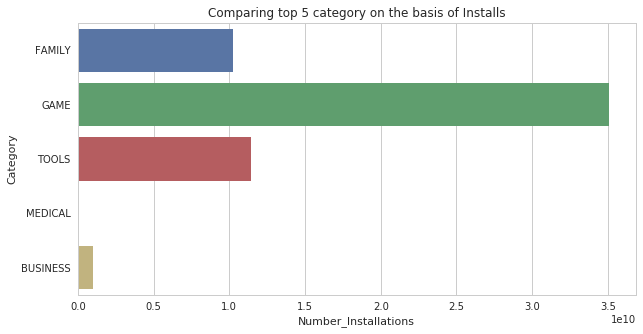

In [21]:
fig = plt.figure(figsize=(10,5))
title=plt.title('Comparing top 5 category on the basis of Installs')
bar=sns.barplot(y=data_top5['Category'],x=data_top5['Number_Installations'])
plt.show(bar)

Text(0.5,1,'Comparing all categories to Install')

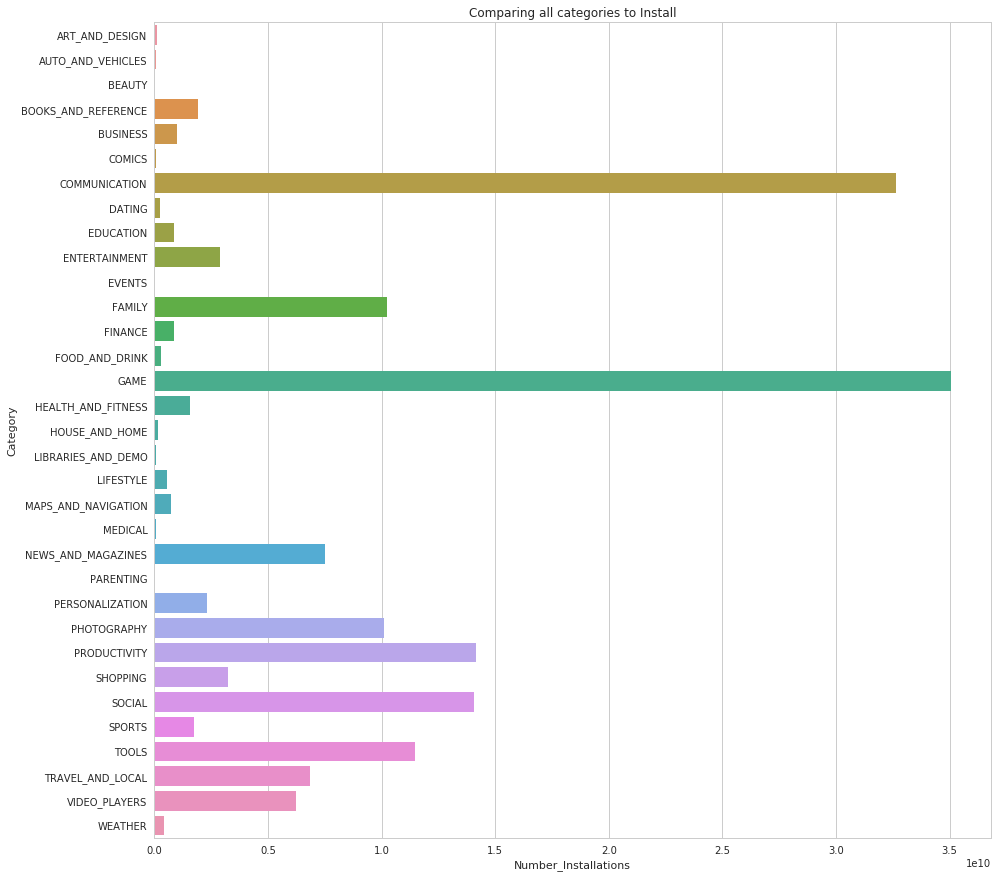

In [22]:
plt.figure(figsize=(15,15))
plt.title("Comparing all categories to Install")
sns.barplot(y=data["Category"],x=data['Number_Installations'])
plt.show(bar)

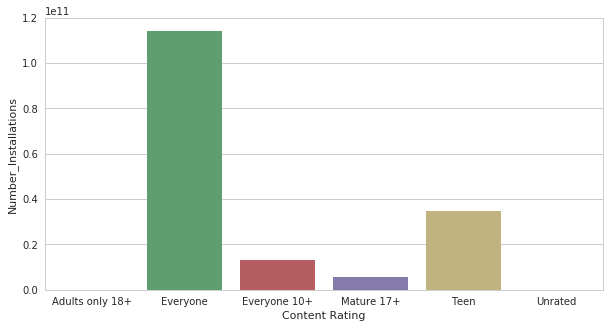

In [23]:
data_cont =  googledata.groupby('Content Rating')['Install'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.show()

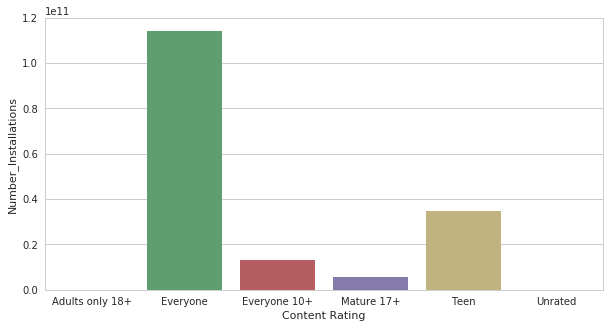

In [24]:
data_cont =  googledata.groupby('Content Rating')['Install'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.show()

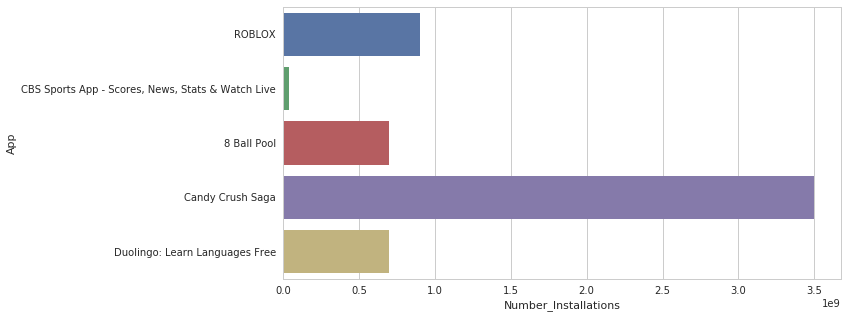

In [25]:
top_app = googledata.groupby('App').size().reset_index(name='Count').nlargest(5,'Count')
top5_app = top_app['App'].tolist()
data_app = googledata.groupby('App')['Install'].agg('sum').loc[top5_app].reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_app['Number_Installations'], y=data_app['App'])
plt.show()

([<matplotlib.patches.Wedge at 0x7fccaa7c7668>,
 [Text(-1.07057,0.252758,'Paid'), Text(1.07057,-0.252758,'free')],
 [Text(-0.583946,0.137868,'92.6%'), Text(0.583946,-0.137868,'7.4%')])

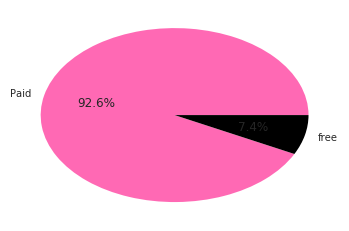

In [26]:
x= googledata.Type.value_counts()
label= ["Paid","free"]
mycolors = ["hotpink","black"]
plt.pie(x,labels= label,autopct= "%1.1f%%", colors = mycolors)
plt.show()

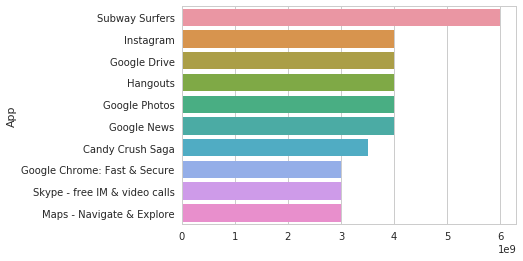

In [27]:
x= googledata.groupby("App").Install.sum().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

So, as the trend of the visualization goes, we can see that it can be a bit difficult to draw an inference from the analysis done. But, there is a small step that can be done to check the relation between the variables in our data. Let us look in to that next.

## Correlation

<b>Correlation</b> is a statistical term describing the degree to which two variables move in coordination with one-another. Correlation coefficients are used to measure the strength of the linear relationship between two variables. There are different types of correlation:

- If the two variables move in the same direction, then those variables are said to have a positive correlation. In this case, the correlation coefficient is greater than zero.
- If they move in opposite directions, then they have a negative correlation. In this case, the correlation coefficient is less than zero.
- In certain cases, the correlation coefficient is exactly zero. This means that there is no relation between the variables.

The value of correlation coefficent varies anywhewre between 1 and -1. The closer the value is to 0, the weaker is the relation and the closer it is to 1 or -1, the stronger is the relation.


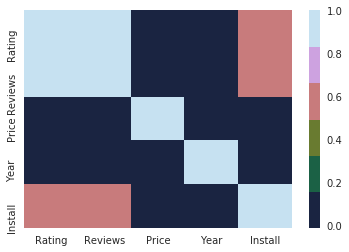

In [28]:
correlation = numeric_data.corr() 
#The value 'numeric_data' is taken from above when we found out the numerical and categorical variables from the dataset 
#after the data type conversions

colour = sns.color_palette("cubehelix")
sns.heatmap(correlation, cmap=colour)

In [29]:
correlation

,Rating,Reviews,Price,Year,Install
Rating,1.000000,1.000000,-0.009667,0.075537,0.643122
Reviews,1.000000,1.000000,-0.009667,0.075537,0.643122
Price,-0.009667,-0.009667,1.000000,-0.007897,-0.011689
Year,0.075537,0.075537,-0.007897,1.000000,0.089368
Install,0.643122,0.643122,-0.011689,0.089368,1.000000


Since the <b>Installs</b> is our target variable, we are looking only at teh correlation cofficient values between Install and other variables. Let us take a look at the values:

- Year vs Install : 0.089368
- Price vs Install : -0.011689
- Reviews vs Install : 0.643122
- Rating vs Install : 0.643122

We can see that Year and Price do not have any significant impact on Install variable.
But Reviews and Ratings do seem to have an impact on our target variable.


Let us now check if categorical variables have an effect

In [30]:
#number of installations per Content rating
install_sum_content = googledata.groupby('Content Rating')['Install'].agg('sum').reset_index(name='Number_Installations')

# number of installations per app per content rating
app_sum_content = googledata.groupby('Content Rating')['Install'].size().reset_index(name='Number_Apps')

In [31]:
install_sum_content

,Content Rating,Number_Installations
0,Adults only 18+,2000000
1,Everyone,114156659621
2,Everyone 10+,13233881795
3,Mature 17+,5524491178
4,Teen,34716350393
5,Unrated,50500


In [32]:
app_sum_content

,Content Rating,Number_Apps
0,Adults only 18+,3
1,Everyone,8714
2,Everyone 10+,414
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


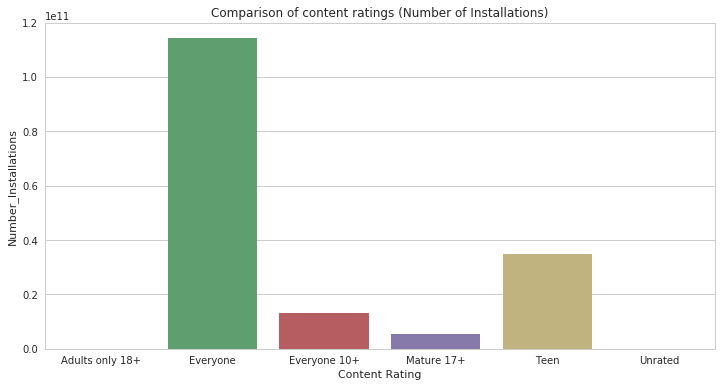

In [33]:
fig=plt.figure(figsize=(12,6))
    
title=plt.title('Comparison of content ratings (Number of Installations)')
content_bar = sns.barplot(x=install_sum_content['Content Rating'],y=install_sum_content['Number_Installations'])
plt.show(content_bar)

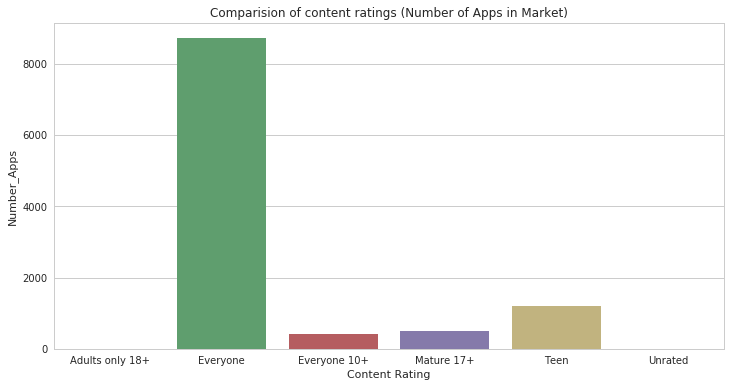

In [34]:
fig=plt.figure(figsize=(12,6))
title=plt.title('Comparision of content ratings (Number of Apps in Market)')
content_bar = sns.barplot(x=app_sum_content['Content Rating'],y=app_sum_content['Number_Apps'])
plt.show(content_bar) 

The above graphs depicts that there is a significant number of installations on content other than Everyone like Teens and Evryone 10+. SO let us know break it down and look for more information on this one.

In [35]:
#Temporary dataframe with improved comparision metric for content rating
content=pd.DataFrame()
content['Content Rating'] = app_sum_content['Content Rating']
content['No_Installations/Total_Apps']=install_sum_content['Number_Installations']/app_sum_content['Number_Apps']

In [36]:
content

,Content Rating,No_Installations/Total_Apps
0,Adults only 18+,6.666667e+05
1,Everyone,1.310037e+07
2,Everyone 10+,3.196590e+07
3,Mature 17+,1.107112e+07
4,Teen,2.873870e+07
5,Unrated,2.525000e+04


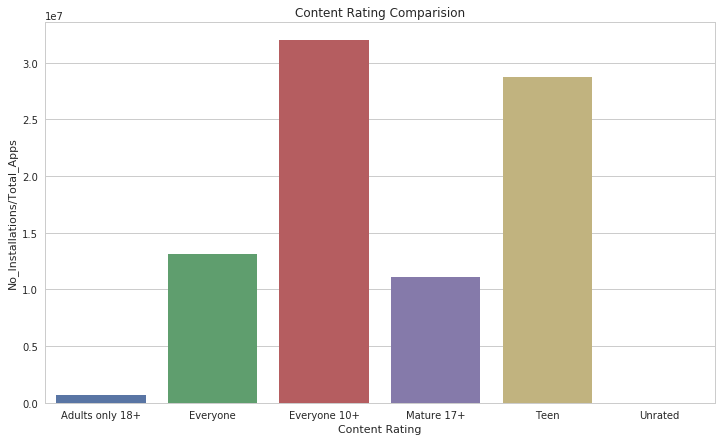

In [37]:
#Visualize content
figure=plt.figure(figsize=(12,7))
title=plt.title('Content Rating Comparision')
bar=sns.barplot(x=content['Content Rating'],y=content['No_Installations/Total_Apps'])
plt.show(bar)

Here we did a plot between the content rating and number of installations by total apps. We see that there are significant amoutn of installations. Hence, we can deduce that Content Rating too play an important part in predicting our Target variable, Install.

Let us now try to find out if any variation in data is caused depending on whether the app is free or paid.

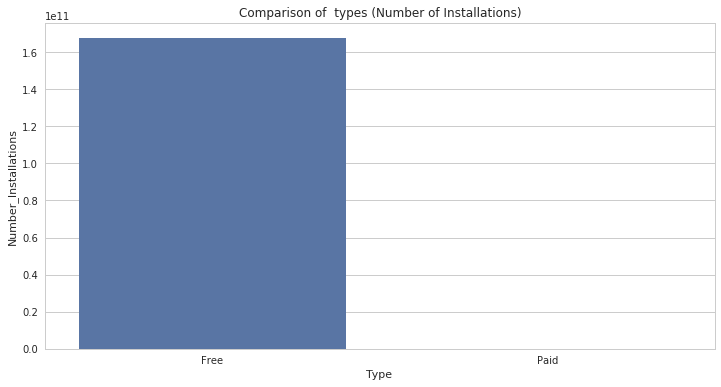

In [38]:
install_sum_type = googledata.groupby('Type')['Install'].agg('sum').reset_index(name='Number_Installations')

fig=plt.figure(figsize=(12,6))
    
title=plt.title('Comparison of  types (Number of Installations)')
content_bar = sns.barplot(x=install_sum_type['Type'],y=install_sum_type['Number_Installations'])
plt.show(content_bar)

Here we can conclude that the variable 'Type' does not have any influence as most installed apps are free.

Lastly, we are taking the name of the apps and checking whether there is any influence of this variable on the number of installations.

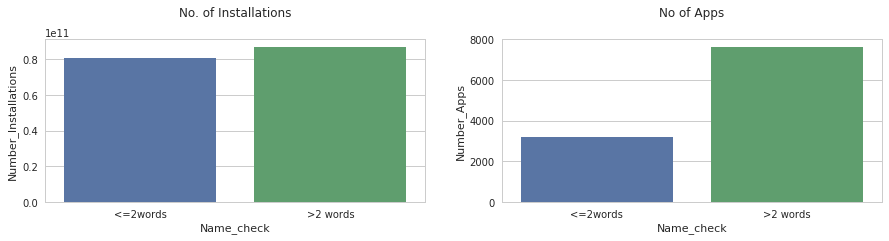

In [39]:
googledata['Name_check']=['>2 words' if len(x.split())>2 else '<=2words' for x in googledata['App'] ]

data_install= googledata.groupby('Name_check')['Install'].agg('sum').reset_index(name='Number_Installations')
data_apps= googledata.groupby('Name_check').size().reset_index(name='Number_Apps')


fig,axes = plt.subplots(figsize=(15,3),ncols=2, nrows=1)

title=axes[0].set_title("No. of Installations", y = 1.1)
title=axes[1].set_title("No of Apps", y = 1.1)

plot1=sns.barplot( x=data_install['Name_check'],y=data_install['Number_Installations'] , ax=axes[0])

plot2=sns.barplot( x=data_apps['Name_check'],y=data_apps['Number_Apps'] , ax=axes[1])

plt.show(fig)


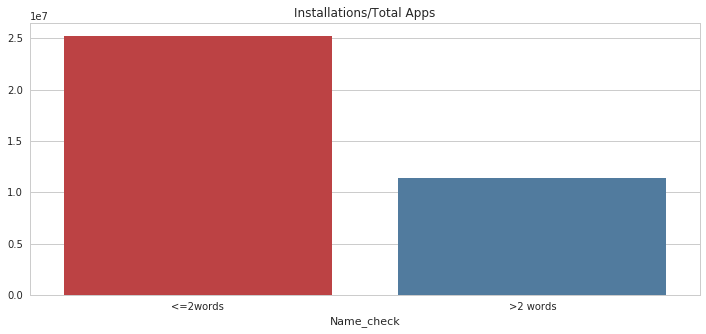

In [40]:
# No. of installation / No. of apps

figure=plt.figure(figsize=(12,5))
title=plt.title("Installations/Total Apps", y = 1.0)
plot3=sns.barplot( x=data_apps['Name_check'],y=data_install['Number_Installations']/data_apps['Number_Apps'] ,palette=sns.color_palette(palette="Set1",n_colors=2,desat=.8))
plt.show(figure)

We can see a definite variations in the our plot. It can be inferred that users prefer apps with smaller names(2 words or lesser) over apps that have long tedious names. As a user myself, I cannot agree more on this.

Lastly, we are taking the Size variable and trying to find whether it has any profound effect on our target variable, Install. We have cleaned the Size variable but there still remains a String value in the column, 'Varies with device'. Hence we are creating a temporary dataframe with only the float values and using that to find the relation between Install and Size.

In [41]:
#Extracting the size variable and converting it into float data type
googledata_num = googledata[googledata["Size"]!='Varies with device']
googledata_num["Size"] = [float(x) if isinstance(x,float) else x for x in googledata_num["Size"]]

#creating new temporary data frame iwth just Install and Size variables.
gdnum = pd.DataFrame()
gdnum["Size"] = googledata_num["Size"]
gdnum["Install"] = googledata_num["Install"]
gdnum.head()

,Size,Install
0,19.0,10000
1,14.0,500000
2,8.7,5000000
3,25.0,50000000
4,2.8,100000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

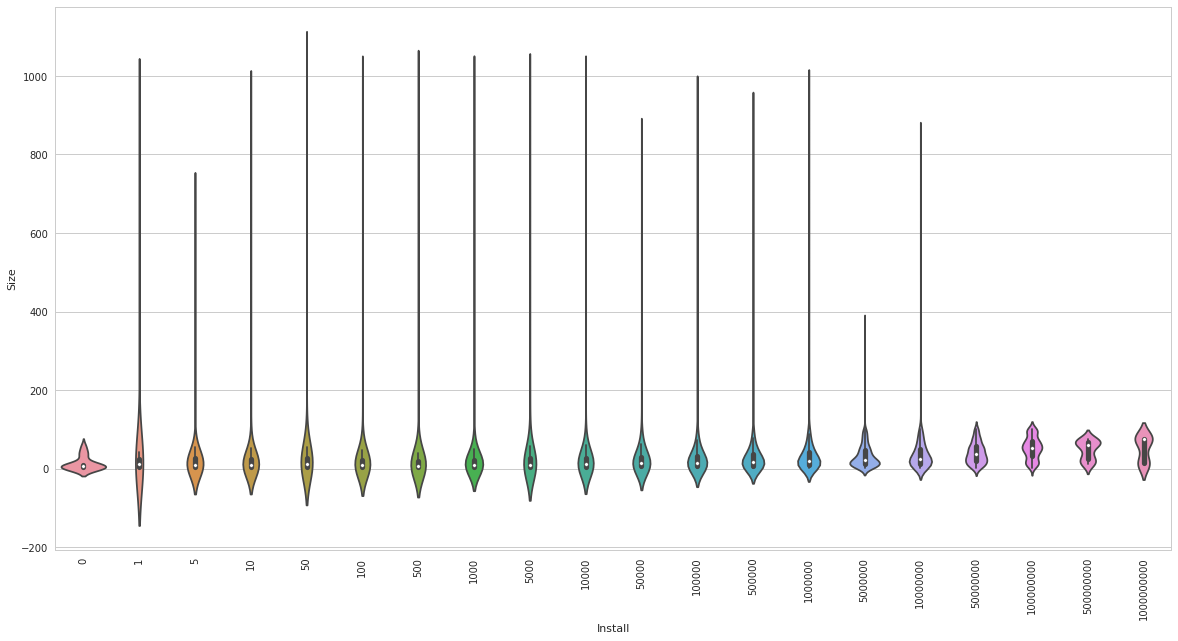

In [42]:
# Using violin plot to plot the relation 
plt.figure(figsize=(20,10))
sns.violinplot(x=gdnum.Install, y=gdnum.Size)
plt.xticks(rotation = 90)

We can see from the plot that there is a profound impact by the size of the app on the number of installations. 

- The tiny white circle in middle of each plot shows the median value of each value of installations. Across the plot, we can see the median grows steadliy higher.
- It is found that at the lower end of the Install axis, there is a higher number of outliers with respect to the size of the apps. 
- As we progress across the Install axis, the number of outliers decreases and the number if installations increases
- As the number of installations reaches the maximum value, we see that the app size has reached the lowest values, peaking at posiibly, 100 -110 MB.

From this we can safely predict that bigger the app, lesser the chance for it to be installed

## Conclusion

We have reached the end of our EDA on the Google Playstore dataset. Taking number of isntallationsa s our dataset, we have found out the following infereneces:

- Ratings have an effect on our target variable. The higher the rating, more people will be inclined to download the app.
- Similarly, the better the Reviews, more are the chances for the app to be downloaded by more people.
- Apps with shorter names, preferably less than 3 words in name, have a hugher chance of being downloaded by the general public.
- People are always inclined to download apps that are free of cost.
- Apps coming under the content Rating, Everyone, Teens and Everyone 10+ has the highest chance to be downloaded. For prospective app developers and publishers, it will be worthwhile to download apps falling under these Content Rating.
- The apps with smaller sizes have more chance to be downloaded.
- Subway surfer is the most downloaded app followed by Instagram and Google Drive
- 92.6% of the apps in the app store are free.